Import Libraries

In [17]:

import pandas as pd
import numpy as np


CSV_PATH = "noise_with_price.csv"  

df = pd.read_csv(CSV_PATH)


print("Shape:", df.shape)
display(df.head(10))


df_info = df.info()
display(df.describe().T)

date_cols = [c for c in df.columns if c.lower() in {"date"}]
if date_cols:
    dcol = date_cols[0]
    df[dcol] = pd.to_datetime(df[dcol], errors="coerce")
    df = df.sort_values([dcol, "Station"] if "Station" in df.columns else [dcol]).reset_index(drop=True)


print("\nMissing values per column:")
print(df.isna().sum().sort_values(ascending=False))

if "Station" in df.columns:
    print("\nStations & counts:")
    print(df["Station"].value_counts().head(15))

for tgt in ["Price_per_SqFt", "Price_in_Lakhs"]:
    if tgt in df.columns:
        print(f"\n{tgt} summary:")
        display(df[[tgt]].describe())


Shape: (715, 14)


,Station,Year,Month,Day,Night,DayLimit,NightLimit,Date,StationEncoded,DayExcess,NightExcess,MeanExcess,Price_per_SqFt,Price_in_Lakhs
0,BEN01,2011,2,0.556357,-0.243566,-0.782821,-0.754469,2011-02-01,0,0.981018,0.575138,0.778078,0.03,145.38
1,BEN01,2011,3,0.556357,0.104734,-0.782821,-0.754469,2011-03-01,0,0.981018,0.758926,0.869972,0.03,89.30
2,BEN01,2011,4,0.556357,-0.069416,-0.782821,-0.754469,2011-04-01,0,0.981018,0.667032,0.824025,0.03,130.41
3,BEN01,2011,5,0.556357,-0.243566,-0.782821,-0.754469,2011-05-01,0,0.981018,0.575138,0.778078,0.03,94.91
4,BEN01,2011,6,0.734901,-0.069416,-0.782821,-0.754469,2011-06-01,0,1.081394,0.667032,0.874213,0.03,133.05
5,BEN01,2011,7,0.734901,-0.069416,-0.782821,-0.754469,2011-07-01,0,1.081394,0.667032,0.874213,0.03,99.07
6,BEN01,2011,8,0.734901,0.278884,-0.782821,-0.754469,2011-08-01,0,1.081394,0.850819,0.966106,0.03,111.13
7,BEN01,2011,9,0.556357,-0.243566,-0.782821,-0.754469,2011-09-01,0,0.981018,0.575138,0.778078,0.03,88.56
8,BEN01,2011,10,0.556357,-0.243566,-0.782821,-0.754469,2011-10-01,0,0.981018,0.575138,0.778078,0.03,83.50
9,BEN01,2011,11,0.556357,-0.243566,-0.782821,-0.754469,2011-11-01,0,0.981018,0.575138,0.778078,0.03,74.70


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Station         715 non-null    object 
 1   Year            715 non-null    int64  
 2   Month           715 non-null    int64  
 3   Day             715 non-null    float64
 4   Night           715 non-null    float64
 5   DayLimit        715 non-null    float64
 6   NightLimit      715 non-null    float64
 7   Date            715 non-null    object 
 8   StationEncoded  715 non-null    int64  
 9   DayExcess       715 non-null    float64
 10  NightExcess     715 non-null    float64
 11  MeanExcess      715 non-null    float64
 12  Price_per_SqFt  715 non-null    float64
 13  Price_in_Lakhs  715 non-null    float64
dtypes: float64(9), int64(3), object(2)
memory usage: 78.3+ KB


,count,mean,std,min,25%,50%,75%,max
Year,715.0,2.015196e+03,2.173364,2011.000000,2014.000000,2016.000000,2017.000000,2018.000000
Month,715.0,6.538462e+00,3.435621,1.000000,4.000000,7.000000,10.000000,12.000000
Day,715.0,-1.997692e-03,0.993571,-2.835973,-0.871992,0.199270,0.734901,3.145241
Night,715.0,-1.987532e-16,1.000700,-4.945617,-0.591866,-0.069416,0.627184,4.458484
DayLimit,715.0,-3.229740e-16,1.000700,-1.370758,-0.782821,0.393055,0.393055,1.568930
NightLimit,715.0,-2.732857e-16,1.000700,-1.247114,-0.754469,0.230819,0.230819,1.708753
StationEncoded,715.0,3.678322e+00,2.754170,0.000000,1.000000,3.000000,6.000000,9.000000
DayExcess,715.0,-3.975064e-17,1.000700,-2.833271,-0.675187,0.077633,0.780266,2.687410
NightExcess,715.0,-1.987532e-17,1.000700,-2.641138,-0.343798,0.115670,0.667032,3.515734
MeanExcess,715.0,-1.987532e-17,0.986106,-2.737205,-0.490760,0.096652,0.769596,3.101572



Missing values per column:
Station           0
Year              0
Month             0
Day               0
Night             0
DayLimit          0
NightLimit        0
Date              0
StationEncoded    0
DayExcess         0
NightExcess       0
MeanExcess        0
Price_per_SqFt    0
Price_in_Lakhs    0
dtype: int64

Stations & counts:
Station
BEN01    95
BEN02    95
BEN03    95
BEN04    95
BEN05    95
BEN06    48
BEN07    48
BEN08    48
BEN09    48
BEN10    48
Name: count, dtype: int64

Price_per_SqFt summary:


,Price_per_SqFt
count,715.000000
mean,0.020476
std,0.009544
min,0.000000
25%,0.010000
50%,0.020000
75%,0.030000
max,0.040000



Price_in_Lakhs summary:


,Price_in_Lakhs
count,715.000000
mean,70.043958
std,41.185450
min,10.110000
25%,35.380000
50%,64.200000
75%,99.695000
max,193.610000


Data Prep for LSTM

In [18]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 1) Features & target
target_col = "Price_in_Lakhs"
drop_cols = ["Station", "Date"]  # drop non-numeric
features = df.drop(columns=drop_cols)
print("Final features:", features.columns.tolist())

# 2) Scale
scaler = MinMaxScaler()
scaled = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled, columns=features.columns)

# 3) Train-test split by time
train_size = int(len(scaled_df) * 0.7)
val_size   = int(len(scaled_df) * 0.15)

train = scaled_df.iloc[:train_size]
val   = scaled_df.iloc[train_size:train_size+val_size]
test  = scaled_df.iloc[train_size+val_size:]

print("Splits:", len(train), len(val), len(test))

# 4) Create sequences (LSTM needs 3D: [samples, timesteps, features])
def create_sequences(data, target_col, seq_len=12):
    X, y = [], []
    target_idx = data.columns.get_loc(target_col)
    arr = data.values
    for i in range(len(arr) - seq_len):
        X.append(arr[i:i+seq_len])
        y.append(arr[i+seq_len, target_idx])
    return np.array(X), np.array(y)

SEQ_LEN = 12  # ~1 year window
X_train, y_train = create_sequences(train, target_col, SEQ_LEN)
X_val, y_val     = create_sequences(val, target_col, SEQ_LEN)
X_test, y_test   = create_sequences(test, target_col, SEQ_LEN)

print("Shapes ->")
print("Train:", X_train.shape, y_train.shape)
print("Val  :", X_val.shape, y_val.shape)
print("Test :", X_test.shape, y_test.shape)


Final features: ['Year', 'Month', 'Day', 'Night', 'DayLimit', 'NightLimit', 'StationEncoded', 'DayExcess', 'NightExcess', 'MeanExcess', 'Price_per_SqFt', 'Price_in_Lakhs']
Splits: 500 107 108
Shapes ->
Train: (488, 12, 12) (488,)
Val  : (95, 12, 12) (95,)
Test : (96, 12, 12) (96,)


Build the LSTM Model

In [19]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# 1) Define model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(SEQ_LEN, len(features.columns))),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(16, activation="relu"),
    Dense(1)   # regression output
])

# 2) Compile
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# 3) Early stopping
es = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

# 4) Train
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=16,
    callbacks=[es],
    verbose=1
)


Epoch 1/100


C:\Users\Dia\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0649 - mae: 0.1987 - val_loss: 0.0492 - val_mae: 0.1793
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0403 - mae: 0.1709 - val_loss: 0.0491 - val_mae: 0.1785
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0460 - mae: 0.1819 - val_loss: 0.0491 - val_mae: 0.1826
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0407 - mae: 0.1699 - val_loss: 0.0472 - val_mae: 0.1755
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0465 - mae: 0.1777 - val_loss: 0.0512 - val_mae: 0.1803
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0429 - mae: 0.1763 - val_loss: 0.0462 - val_mae: 0.1723
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0436 - mae: 0.1742 - val_loss: 0.0498 - val_mae: 0.1876
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0402 - mae: 0.1678 - val_loss: 0.0460 - val_mae: 0.1704
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0390 - mae: 0.

Evaluate on Test Set

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step 
Test MAE (Lakhs): 31.274618911423406
Test RMSE (Lakhs): 38.81272611290272


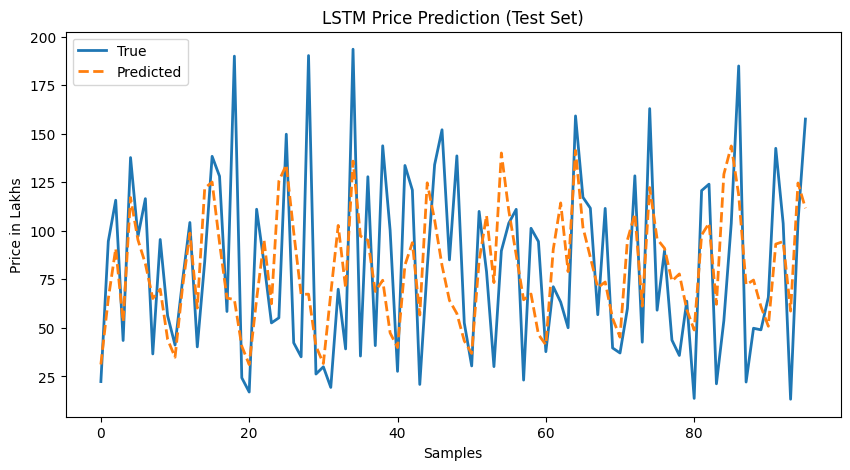

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1) Predict
y_pred = model.predict(X_test).ravel()   # flatten

# 2) Inverse scale (back to Lakhs)
target_idx = features.columns.get_loc(target_col)

def inverse_scale(y_scaled):
    dummy = np.zeros((len(y_scaled), scaled_df.shape[1]))
    dummy[:, target_idx] = y_scaled
    inv = scaler.inverse_transform(dummy)
    return inv[:, target_idx]

# Inverse scale both true and predicted
y_test_inv = inverse_scale(y_test)
y_pred_inv = inverse_scale(y_pred)

# 3) Metrics
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print("Test MAE (Lakhs):", mae)
print("Test RMSE (Lakhs):", rmse)

# 4) Plot
plt.figure(figsize=(10,5))
plt.plot(y_test_inv, label="True", linewidth=2)
plt.plot(y_pred_inv, label="Predicted", linewidth=2, linestyle="--")
plt.legend()
plt.title("LSTM Price Prediction (Test Set)")
plt.xlabel("Samples")
plt.ylabel("Price in Lakhs")
plt.show()


Save model + inference pipeline

In [21]:
import joblib
from tensorflow.keras.models import load_model

# 1) Save LSTM model
model.save("lstm_price_model.keras")


# 2) Save scaler
joblib.dump(scaler, "scaler.pkl")

# 3) Save feature list + target col
import json
meta = {
    "features": features.columns.tolist(),
    "target": target_col
}
with open("meta.json", "w") as f:
    json.dump(meta, f)


Reload + inference function

In [22]:
from tensorflow.keras.models import load_model
import joblib, json
import pandas as pd
import numpy as np

# Reload everything (use .keras format instead of .h5)
model = load_model("lstm_price_model.keras")
scaler = joblib.load("scaler.pkl")

with open("meta.json") as f:
    meta = json.load(f)
features_list = meta["features"]
target_col = meta["target"]
target_idx = features_list.index(target_col)

# Inference function
def predict_price(new_row: dict):
    """
    new_row: dict with same keys as features_list (except target)
    """
    # 1) Make DataFrame
    df_new = pd.DataFrame([new_row])
    
    # 2) Align columns
    df_new = df_new.reindex(columns=features_list, fill_value=0)
    
    # 3) Scale
    scaled = scaler.transform(df_new)
    X_new = scaled.reshape((1, scaled.shape[1], scaled.shape[1]))
    
    # 4) Predict
    pred_scaled = model.predict(X_new).ravel()
    
    # 5) Inverse scale
    dummy = np.zeros((len(pred_scaled), scaled.shape[1]))
    dummy[:, target_idx] = pred_scaled
    inv = scaler.inverse_transform(dummy)
    return inv[:, target_idx][0]


In [23]:
def predict_price(new_input):
    if isinstance(new_input, dict):
        # dict → single row → scale → expand to sequence
        df_new = pd.DataFrame([new_input])
        df_new = df_new.reindex(columns=features_list, fill_value=0)
        scaled = scaler.transform(df_new)
        # repeat row 12 times for sequence
        X_new = np.repeat(scaled[np.newaxis, :, :], 12, axis=1)  # (1, 12, features)

    elif isinstance(new_input, np.ndarray):
        if new_input.ndim == 2 and new_input.shape == (12, len(features_list)):
            # Already a sequence from X_test
            X_new = new_input[np.newaxis, :, :]   # (1, 12, features)
        elif new_input.ndim == 1 and new_input.shape[0] == len(features_list):
            # Single row → expand to sequence
            scaled = new_input.reshape(1, -1)
            X_new = np.repeat(scaled[:, np.newaxis, :], 12, axis=1)
        else:
            raise ValueError("Unexpected shape for numpy input")

    else:
        raise ValueError("Input must be dict or numpy array")

    # Predict
    pred_scaled = model.predict(X_new).ravel()

    # Inverse scale
    dummy = np.zeros((len(pred_scaled), len(features_list)))
    dummy[:, target_idx] = pred_scaled
    inv = scaler.inverse_transform(dummy)
    return inv[:, target_idx][0]


In [24]:
predicted_price = predict_price(X_test[0])
print(f"Predicted Price (Lakhs): {predicted_price:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
Predicted Price (Lakhs): 31.16


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step 
Test MAE  : 31.27 Lakhs
Test RMSE : 38.81 Lakhs
Test R²   : 0.313


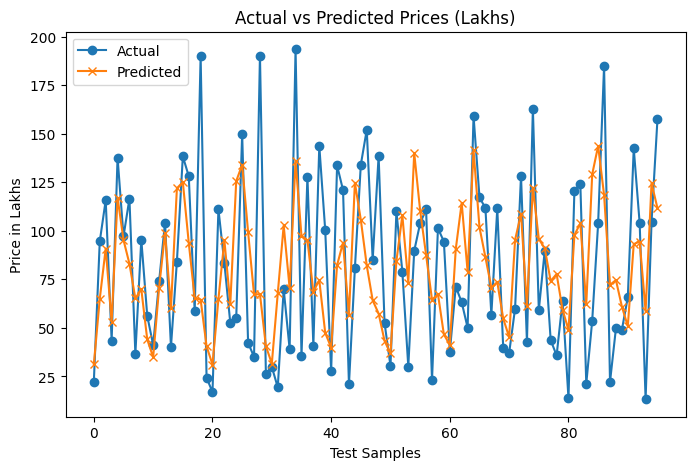

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# --- Evaluate on Test Set ---
y_pred_scaled = model.predict(X_test)

# Inverse scale
def inverse_scale(y_scaled):
    dummy = np.zeros((len(y_scaled), scaled_df.shape[1]))
    dummy[:, target_idx] = y_scaled.ravel()
    inv = scaler.inverse_transform(dummy)
    return inv[:, target_idx]

y_test_inv = inverse_scale(y_test)
y_pred_inv = inverse_scale(y_pred_scaled)

# --- Metrics ---
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))  # fixed
r2 = r2_score(y_test_inv, y_pred_inv)

print(f"Test MAE  : {mae:.2f} Lakhs")
print(f"Test RMSE : {rmse:.2f} Lakhs")
print(f"Test R²   : {r2:.3f}")

# --- Plot Actual vs Predicted ---
plt.figure(figsize=(8,5))
plt.plot(y_test_inv, label="Actual", marker="o")
plt.plot(y_pred_inv, label="Predicted", marker="x")
plt.title("Actual vs Predicted Prices (Lakhs)")
plt.xlabel("Test Samples")
plt.ylabel("Price in Lakhs")
plt.legend()
plt.show()


In [26]:
import pandas as pd

df = pd.read_csv("noise_with_price.csv")
print(df.columns)


Index(['Station', 'Year', 'Month', 'Day', 'Night', 'DayLimit', 'NightLimit',
       'Date', 'StationEncoded', 'DayExcess', 'NightExcess', 'MeanExcess',
       'Price_per_SqFt', 'Price_in_Lakhs'],
      dtype='object')


In [27]:
X = df.drop("Price_in_Lakhs", axis=1)
y = df["Price_in_Lakhs"]


Test MAE  : 23.45 Lakhs
Test RMSE : 30.62 Lakhs
Test R²   : 0.444


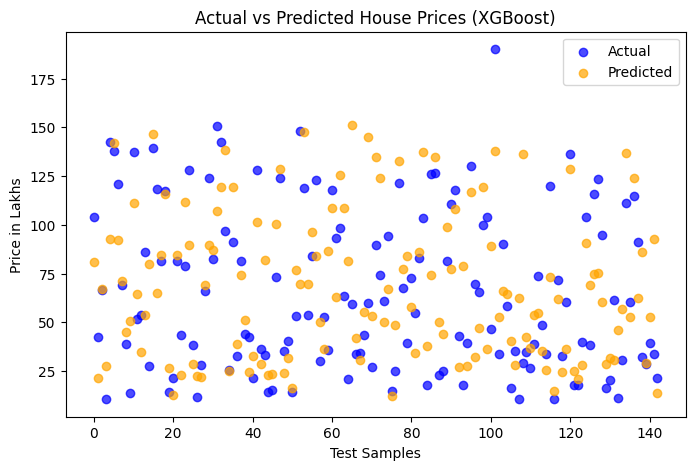

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

# --- Load your dataset ---
df = pd.read_csv("noise_with_price.csv")   # 👈 replace with your dataset file


# --- Split features and target ---
X = df.drop(["Price_in_Lakhs", "Station", "Date"], axis=1)  # drop target + non-numeric
y = df["Price_in_Lakhs"]



# --- Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- XGBoost Model ---
xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)

# --- Predictions ---
y_pred = xgb_model.predict(X_test)

# --- Evaluation ---
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Test MAE  : {mae:.2f} Lakhs")
print(f"Test RMSE : {rmse:.2f} Lakhs")
print(f"Test R²   : {r2:.3f}")

# --- Plot Actual vs Predicted ---
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(range(len(y_test)), y_test, label="Actual", color="blue", alpha=0.7)
plt.scatter(range(len(y_pred)), y_pred, label="Predicted", color="orange", alpha=0.7)
plt.title("Actual vs Predicted House Prices (XGBoost)")
plt.xlabel("Test Samples")
plt.ylabel("Price in Lakhs")
plt.legend()
plt.show()



XGBoost Results:
 MAE  : 23.45 Lakhs
 RMSE : 30.62 Lakhs
 R²   : 0.444


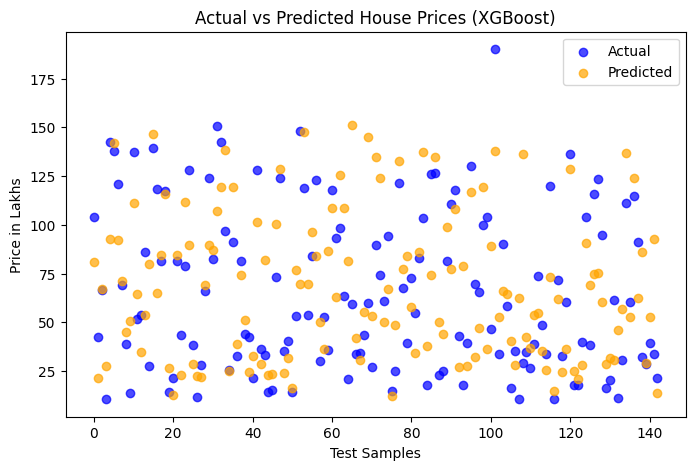

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000142 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 333
[LightGBM] [Info] Number of data points in the train set: 572, number of used features: 11
[LightGBM] [Info] Start training from score 71.127535
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

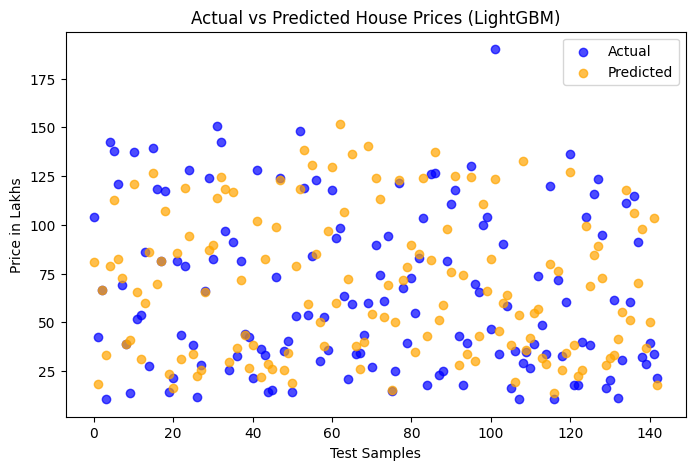


RandomForest Results:
 MAE  : 20.89 Lakhs
 RMSE : 27.80 Lakhs
 R²   : 0.542


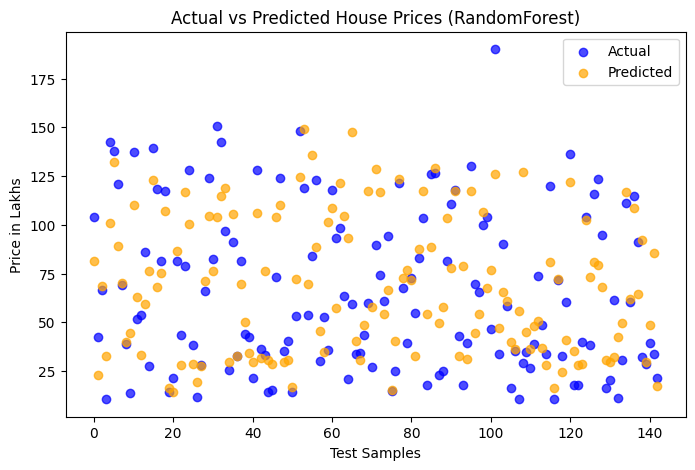


--- Model Comparison ---
XGBoost      | MAE: 23.45 | RMSE: 30.62 | R²: 0.444
LightGBM     | MAE: 22.18 | RMSE: 29.10 | R²: 0.498
RandomForest | MAE: 20.89 | RMSE: 27.80 | R²: 0.542


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor

# --- Load dataset ---
df = pd.read_csv("noise_with_price.csv")

# --- Features / Target ---
X = df.drop(["Price_in_Lakhs", "Station", "Date"], axis=1)
y = df["Price_in_Lakhs"]

# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Models ---
models = {
    "XGBoost": XGBRegressor(
        n_estimators=500, learning_rate=0.05, max_depth=6,
        subsample=0.8, colsample_bytree=0.8, random_state=42
    ),
    "LightGBM": LGBMRegressor(
        n_estimators=500, learning_rate=0.05, max_depth=-1,
        subsample=0.8, colsample_bytree=0.8, random_state=42
    ),
    "RandomForest": RandomForestRegressor(
        n_estimators=300, max_depth=12, random_state=42, n_jobs=-1
    )
}

results = {}

# --- Train & Evaluate ---
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results[name] = (mae, rmse, r2)
    
    print(f"\n{name} Results:")
    print(f" MAE  : {mae:.2f} Lakhs")
    print(f" RMSE : {rmse:.2f} Lakhs")
    print(f" R²   : {r2:.3f}")
    
    # --- Plot ---
    plt.figure(figsize=(8,5))
    plt.scatter(range(len(y_test)), y_test, label="Actual", color="blue", alpha=0.7)
    plt.scatter(range(len(y_pred)), y_pred, label="Predicted", color="orange", alpha=0.7)
    plt.title(f"Actual vs Predicted House Prices ({name})")
    plt.xlabel("Test Samples")
    plt.ylabel("Price in Lakhs")
    plt.legend()
    plt.show()

# --- Compare Results ---
print("\n--- Model Comparison ---")
for name, (mae, rmse, r2) in results.items():
    print(f"{name:12} | MAE: {mae:.2f} | RMSE: {rmse:.2f} | R²: {r2:.3f}")


In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import joblib

# --- Define base model ---
rf = RandomForestRegressor(random_state=42)

# --- Hyperparameter grid ---
param_grid = {
    "n_estimators": [200, 500, 800],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}

# --- GridSearch ---
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring="r2",
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

# --- Best Model ---
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# --- Evaluate on Test Set ---
y_pred = best_rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n--- Tuned Random Forest Performance ---")
print(f"Test MAE  : {mae:.2f} Lakhs")
print(f"Test RMSE : {rmse:.2f} Lakhs")
print(f"Test R²   : {r2:.3f}")

# --- Save model ---
joblib.dump(best_rf, "best_random_forest_model.pkl")
print("\nModel saved as 'best_random_forest_model.pkl'")


Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}

--- Tuned Random Forest Performance ---
Test MAE  : 19.42 Lakhs
Test RMSE : 26.14 Lakhs
Test R²   : 0.595

Model saved as 'best_random_forest_model.pkl'


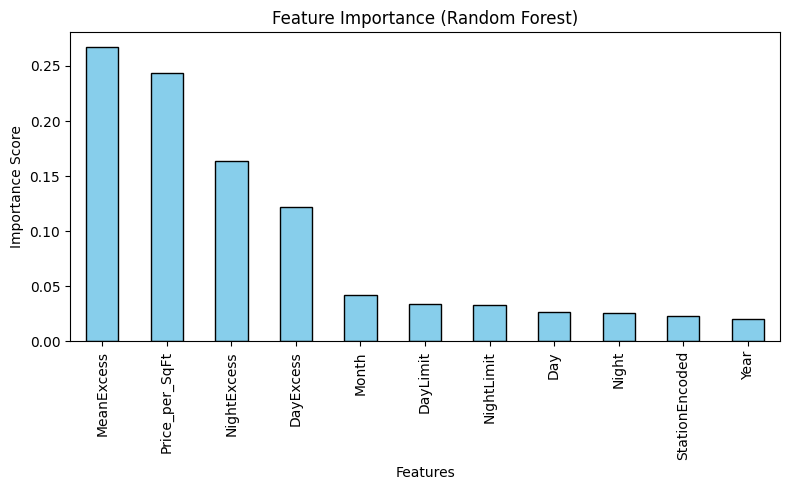


Top 5 Important Features:
 MeanExcess        0.267128
Price_per_SqFt    0.243807
NightExcess       0.163587
DayExcess         0.121690
Month             0.041714
dtype: float64


In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Feature Importance ---
importances = best_rf.feature_importances_
features = X_train.columns
feat_importances = pd.Series(importances, index=features).sort_values(ascending=False)

# --- Plot ---
plt.figure(figsize=(8,5))
feat_importances.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Feature Importance (Random Forest)")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.tight_layout()
plt.show()

print("\nTop 5 Important Features:\n", feat_importances.head())


In [32]:
import numpy as np
import joblib

# --- Load saved model ---
best_rf = joblib.load("best_random_forest_model.pkl")

# --- Prediction function ---
def predict_price(station_encoded, year, month, day, night, day_limit, night_limit, 
                  day_excess, night_excess, mean_excess, price_per_sqft):
    """
    Predicts house price (in Lakhs) given input features.
    """
    # Arrange features in same order as training
    input_data = np.array([[station_encoded, year, month, day, night, day_limit, night_limit, 
                            day_excess, night_excess, mean_excess, price_per_sqft]])
    
    # Predict
    predicted_price = best_rf.predict(input_data)[0]
    return round(predicted_price, 2)

# --- Example usage ---
example_prediction = predict_price(
    station_encoded=2,   # suppose station 2
    year=2024,
    month=8,
    day=15,
    night=55,
    day_limit=50,
    night_limit=40,
    day_excess=5,
    night_excess=15,
    mean_excess=10,
    price_per_sqft=12000
)

print(f"Predicted Price: {example_prediction} Lakhs")


Predicted Price: 119.56 Lakhs


C:\Users\Dia\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
